---

# Analisi delle interazioni

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd   
from scipy import stats
import numpy as np
import pandas as pd
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from EXP_package.functions import *

interactions = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/interacions/facebook_outreach_vs_interaction.csv', usecols=['post_id', 'alpha', 'outreach'])
posts = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/facebook/sample_posts.csv', usecols=['created_time', 'page_id', 'post_id'], encoding='ISO-8859-1')

posts_dict = posts.set_index('post_id').T.to_dict()

interactions['created_time'] = interactions['post_id'].map(lambda x: posts_dict.get(x, {}).get('created_time', None))
interactions['page_id'] = interactions['post_id'].map(lambda x: posts_dict.get(x, {}).get('page_id', None))

interactions=interactions.dropna()


/home/jacoponudo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_51416/3291190977.py:17: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  posts_dict = posts.set_index('post_id').T.to_dict()


1. Parto analizzando una singola pagina.

/tmp/ipykernel_51416/2565189486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_interactions['created_time'] = pd.to_datetime(page_interactions['created_time']).copy()
/tmp/ipykernel_51416/2565189486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_interactions['year'] = page_interactions['created_time'].dt.year
/tmp/ipykernel_51416/2565189486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

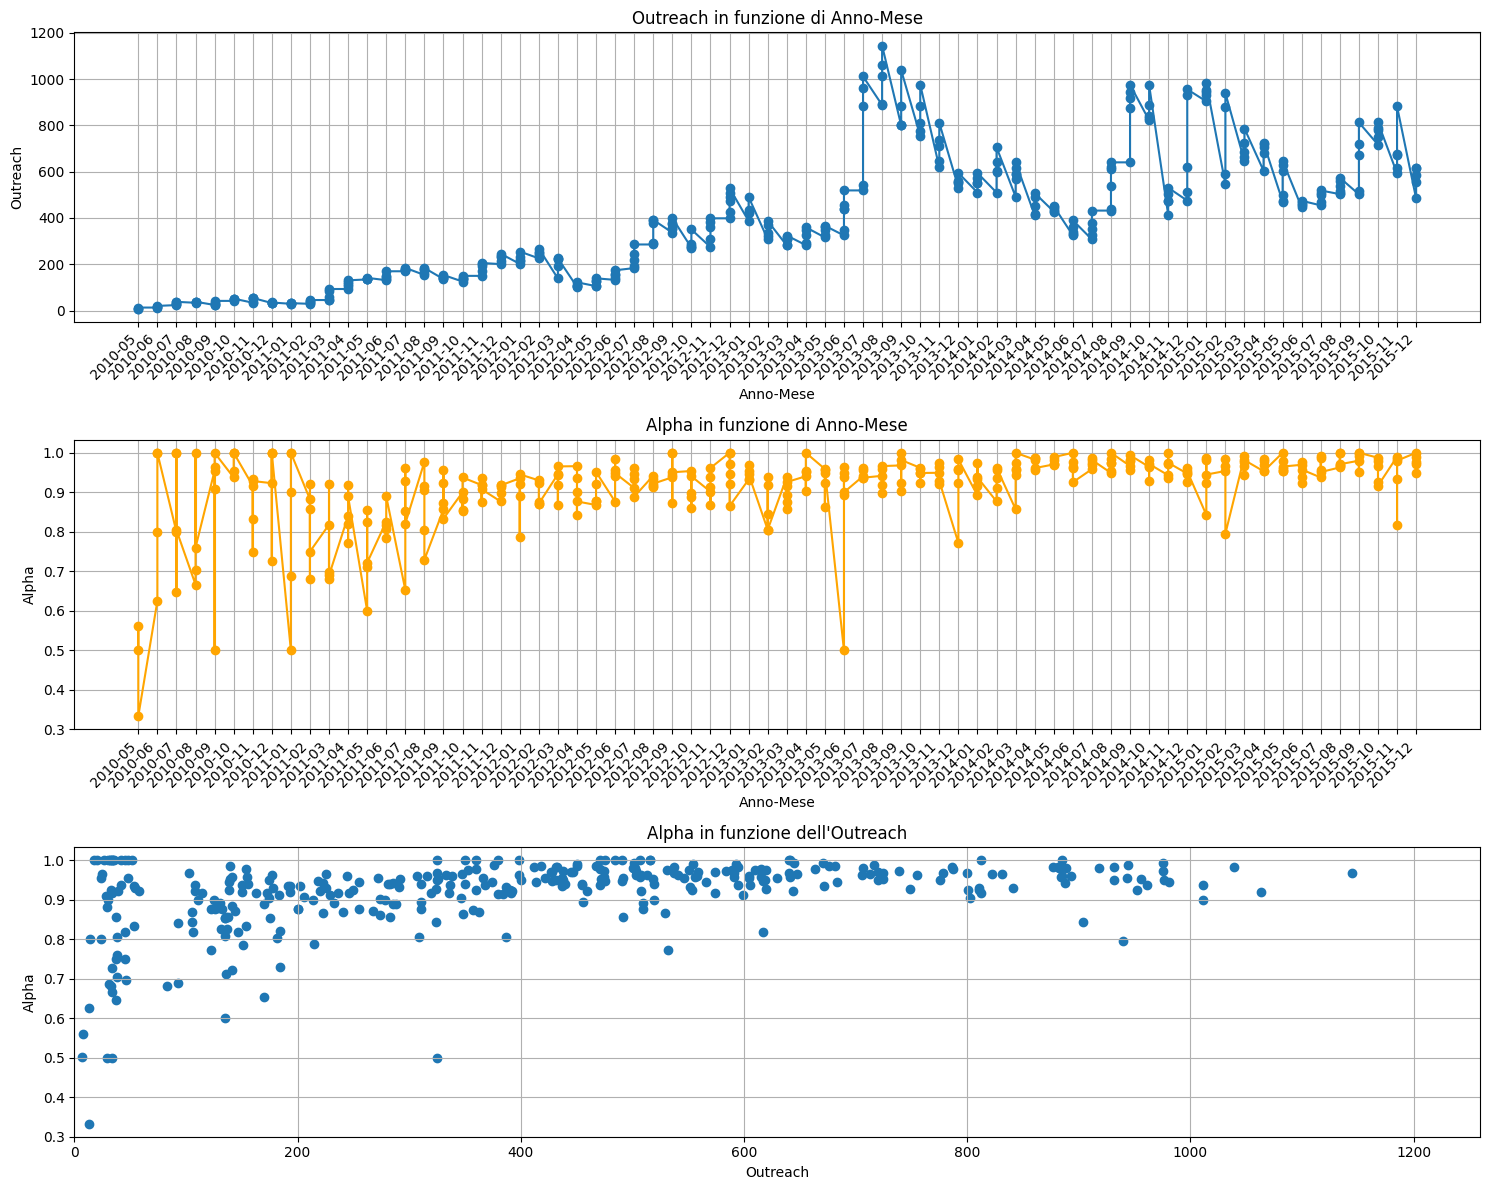

Test di Kolmogorov-Smirnov: statistic = 0.18872861088887494, p-value = 9.17685260366954e-121


"plt.figure(figsize=(12, 6))\nsns.histplot(data=page_interactions, x='outreach', hue='alpha', bins=30, stat='density', common_norm=False, alpha=0.5, kde=True)\nplt.title('Confronto delle distribuzioni di outreach al variare di alpha')\nplt.xlabel('Outreach')\nplt.ylabel('Densità')\nplt.show()"

In [2]:
# Supponendo che 'interactions' sia già definito
page_interactions = interactions[interactions['page_id'] == 102779203091115]
page_interactions['created_time'] = pd.to_datetime(page_interactions['created_time']).copy()
page_interactions['year'] = page_interactions['created_time'].dt.year
#page_interactions=page_interactions[(page_interactions['year']==2013) |(page_interactions['year']==2014)  ]
page_interactions['month'] = page_interactions['created_time'].dt.month
page_interactions['year_month'] = page_interactions['created_time'].dt.to_period('M')
alpha_month_outreach = page_interactions.groupby(['year_month', 'outreach'])['alpha'].mean().reset_index()

# Calcola la data in cui l'outreach supera 10.000
outreach_over_10000 = alpha_month_outreach[alpha_month_outreach['outreach'] > 100000]

# Assicurati che ci sia almeno un valore che supera 10.000
if not outreach_over_10000.empty:
    date_outreach_reaches_10000 = outreach_over_10000['year_month'].astype(str).iloc[0]
else:
    date_outreach_reaches_10000 = None

plt.figure(figsize=(15, 12))

# Primo grafico
plt.subplot(3, 1, 1)
plt.plot(alpha_month_outreach['year_month'].astype(str), alpha_month_outreach['outreach'], marker='o')
plt.title('Outreach in funzione di Anno-Mese')
plt.xlabel('Anno-Mese')
plt.ylabel('Outreach')

# Aggiungi una linea verticale se la data è disponibile
if date_outreach_reaches_10000:
    plt.axvline(x=date_outreach_reaches_10000, color='pink', linestyle='--', label='Outreach supera 10,000')
    plt.legend()

plt.grid()
plt.xticks(rotation=45, ha='right')  

# Secondo grafico
plt.subplot(3, 1, 2)
plt.plot(alpha_month_outreach['year_month'].astype(str), alpha_month_outreach['alpha'], marker='o', color='orange')
plt.title('Alpha in funzione di Anno-Mese')
plt.xlabel('Anno-Mese')
plt.ylabel('Alpha')

# Aggiungi una linea verticale se la data è disponibile
if date_outreach_reaches_10000:
    plt.axvline(x=date_outreach_reaches_10000, color='pink', linestyle='--', label='Outreach supera 10,000')
    plt.legend()

plt.grid()
plt.xticks(rotation=45, ha='right')

# Terzo grafico
plt.subplot(3, 1, 3)
plt.scatter(alpha_month_outreach['outreach'], alpha_month_outreach['alpha'])
plt.title('Alpha in funzione dell\'Outreach')
plt.xlabel('Outreach')
plt.xlim(0,1.1*max(alpha_month_outreach['outreach']))
plt.ylabel('Alpha')
plt.axvline(x=100000, color='pink', linestyle='--', label='Outreach supera 10,000')
plt.grid()

plt.tight_layout()
plt.show()


'''

page_interactions=page_interactions[(page_interactions['year']==2013)]
alpha_month_outreach = page_interactions.groupby(['year_month', 'outreach'])['alpha'].mean().reset_index()

plt.scatter(alpha_month_outreach['outreach'], alpha_month_outreach['alpha'], alpha =0.3)
plt.title('Alpha in funzione dell\'Outreach - 2013')
plt.xlabel('Outreach')
plt.xlim(0,1.1*max(alpha_month_outreach['outreach']))
plt.ylabel('Alpha')
plt.axvline(x=100000, color='pink', linestyle='--', label='Outreach supera 10,000')
plt.grid()

plt.tight_layout()
plt.show()'''

### 

page_interactions=page_interactions.dropna()
alpha_values = page_interactions['alpha'].unique()
outreach_alpha1 = page_interactions[page_interactions['alpha'] == alpha_values[0]]['outreach']
outreach_alpha2 = page_interactions[page_interactions['alpha'] == alpha_values[1]]['outreach']

ks_statistic, p_value = stats.ks_2samp(outreach_alpha1, outreach_alpha2)
print(f'Test di Kolmogorov-Smirnov: statistic = {ks_statistic}, p-value = {p_value}')

'''plt.figure(figsize=(12, 6))
sns.histplot(data=page_interactions, x='outreach', hue='alpha', bins=30, stat='density', common_norm=False, alpha=0.5, kde=True)
plt.title('Confronto delle distribuzioni di outreach al variare di alpha')
plt.xlabel('Outreach')
plt.ylabel('Densità')
plt.show()'''

2. Studiamo che succede a alpha al crescere del numero di outreach attorno alla soglia di 500 utenti.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load data
pages = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/facebook/sample_pages.csv')

# Set threshold
threshold = 300
filtered_pages = pages[(pages['initial_size'] < threshold) & (pages['last_size'] > threshold)]['page_id'].tolist()
pdf_path = '/home/jacoponudo/Documents/Size_effects/PLT/3_size_effect_pages/evaluate_threshold.pdf'

# Counter for pages with at least one bin with mean alpha < 0.85
pages_with_low_alpha = 0  

# Create the PDF and add the introductory page
with PdfPages(pdf_path) as pdf:

    for i in range(0, len(filtered_pages), 9):
        plt.figure(figsize=(15, 12))

        # Initialize the subplot index
        j = 0
        for page_id in filtered_pages[i:i + 9]:
            interactions_filtered = interactions[(interactions['page_id'] == page_id) & (interactions['outreach'] < threshold * 8)]

            if not interactions_filtered.empty:
                # Define bins and categorize outreach
                bins = np.arange(0, threshold * 8, int(threshold / 10))
                labels = [f'{i}-{i + int(threshold/10)}' for i in bins[:-1]]
                interactions_filtered['outreach_class'] = pd.cut(interactions_filtered['outreach'], bins=bins, labels=labels, right=False)

                # Calculate alpha statistics
                alpha_stats = interactions_filtered.groupby('outreach_class')['alpha'].agg(['mean', 'min', 'max']).reset_index()
                alpha_stats['class_mid'] = alpha_stats['outreach_class'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

                # Check if any bin has mean alpha < 0.85
                if (alpha_stats['mean'] < 0.85).any():
                    pages_with_low_alpha += 1  # Increment the counter

                    # Create scatter plot
                    plt.subplot(3, 3, j + 1)  # Use the current index
                    plt.scatter(alpha_stats['class_mid'], alpha_stats['mean'], color='blue', label='Mean Alpha', marker='o', alpha=0.5)
                    plt.axhline(y=0.95, color='orange', linestyle='-', label='Saturazione')
                    plt.axhline(y=0.85, color='green', linestyle='-', label='Conversazione')
                    plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
                    plt.xlabel('Outreach Classes')
                    plt.ylabel('Alpha')
                    plt.ylim(0.5, 1.01)
                    plt.xlim(0, threshold * 8)
                    plt.title(f'Page ID: {page_id}', fontsize=10)
                    if j == 0:
                        plt.legend()
                    plt.grid()

                    j += 1  # Increment j only if a plot was added

        plt.tight_layout(rect=[0, 0, 1, 1])  # Use full page without gaps
        pdf.savefig()
        plt.close()
    plt.figure(figsize=(8, 6))
    plt.text(0.5, 0.7, f'Numero di pagine da testare attorno alla soglia {threshold}: {len(filtered_pages)}, {len(pages)}', fontsize=12, ha='center')
    plt.text(0.5, 0.5, f'Numero di pagine con almeno un bin con alpha medio < 0.85: {pages_with_low_alpha}, {len(filtered_pages)}', fontsize=12, ha='center')
    plt.axis('off')  # Turn off the axis
    pdf.savefig()
    plt.close()

print(f'Numero di pagine da testare attorno alla soglia {threshold}: {len(filtered_pages)}, {len(pages)}')
print(f'Numero di pagine con almeno un bin con alpha medio < 0.85: {pages_with_low_alpha}, {len(filtered_pages)}')


/tmp/ipykernel_51416/1790336822.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions_filtered['outreach_class'] = pd.cut(interactions_filtered['outreach'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_51416/1790336822.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alpha_stats = interactions_filtered.groupby('outreach_class')['alpha'].agg(['mean', 'min', 'max']).reset_index()
/tmp/ipykernel_51416/1790336822.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Numero di pagine da testare attorno alla soglia 300: 30, 93
Numero di pagine con almeno un bin con alpha medio < 0.85: 13, 30


3. Filtriamo con lo stesso criterio, con una size che  passa per la threshold e con un alpha minimo di almeno 0.8, e faccio un unico plot.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load data
pages = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/facebook/sample_pages.csv')

# Set threshold
threshold = 300
filtered_pages = pages[(pages['initial_size'] < threshold) & (pages['last_size'] > threshold)]['page_id'].tolist()
pdf_path = '/home/jacoponudo/Documents/Size_effects/PLT/3_size_effect_pages/evaluate_threshold_all.pdf'

# Create the PDF
with PdfPages(pdf_path) as pdf:
    plt.figure(figsize=(15, 12))

    # Initialize the counter for pages with at least one bin with mean alpha < 0.85
    pages_with_low_alpha = 0  

    for page_id in filtered_pages:
        interactions_filtered = interactions[(interactions['page_id'] == page_id) & (interactions['outreach'] < threshold * 8)]

        if not interactions_filtered.empty:
            # Define bins and categorize outreach
            bins = np.arange(0, threshold * 8, int(threshold / 10))
            labels = [f'{i}-{i + int(threshold/10)}' for i in bins[:-1]]
            interactions_filtered['outreach_class'] = pd.cut(interactions_filtered['outreach'], bins=bins, labels=labels, right=False)

            # Calculate alpha statistics
            alpha_stats = interactions_filtered.groupby('outreach_class')['alpha'].agg(['mean', 'min', 'max']).reset_index()
            alpha_stats['class_mid'] = alpha_stats['outreach_class'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

            # Check if any bin has mean alpha < 0.85
            if (alpha_stats['mean'] < 0.85).any():
                pages_with_low_alpha += 1  # Increment the counter

            # Create scatter plot for the current page
            plt.scatter(alpha_stats['class_mid'], alpha_stats['mean'], label=f'Page ID: {page_id}', marker='o', alpha=0.5)

    # Add reference lines
    plt.axhline(y=0.95, color='orange', linestyle='-', label='Saturazione')
    plt.axhline(y=0.85, color='green', linestyle='-', label='Conversazione')
    plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')

    plt.xlabel('Outreach Classes')
    plt.ylabel('Alpha')
    plt.ylim(0.5, 1.01)
    plt.xlim(0, threshold * 8)
    plt.title('Mean Alpha for Filtered Pages', fontsize=15)
    plt.legend(loc='upper right', fontsize='small')
    plt.grid()

    # Save the figure to the PDF
    pdf.savefig()
    plt.close()

# Additional summary statistics
print(f'Numero di pagine da testare attorno alla soglia {threshold}: {len(filtered_pages)}, {len(pages)}')
print(f'Numero di pagine con almeno un bin con alpha medio < 0.85: {pages_with_low_alpha}, {len(filtered_pages)}')


/tmp/ipykernel_51416/957261173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions_filtered['outreach_class'] = pd.cut(interactions_filtered['outreach'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_51416/957261173.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alpha_stats = interactions_filtered.groupby('outreach_class')['alpha'].agg(['mean', 'min', 'max']).reset_index()
/tmp/ipykernel_51416/957261173.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Numero di pagine da testare attorno alla soglia 300: 30, 93
Numero di pagine con almeno un bin con alpha medio < 0.85: 13, 30


4. Applico il test di significatività del size effect a tutte le pagine, quante sono significative?

In [8]:
results = []

threshold=500

page_ids = pages[(pages['initial_size'] < threshold) & (pages['last_size'] > threshold)]['page_id'].tolist()
for page_id in page_ids:
    page_interactions = interactions[interactions['page_id'] == page_id]
    page_interactions = page_interactions.dropna()
    
    if len(page_interactions) == 0:
        continue
    
    alpha_vals = page_interactions['alpha'].unique()
    alpha_vals_sorted = np.sort(alpha_vals)
    
    outreach_per_alpha = [page_interactions[page_interactions['alpha'] == val]['outreach'] for val in alpha_vals_sorted]
    if len(outreach_per_alpha) > 1:
        t_statistic, t_pvalue = stats.ttest_ind(outreach_per_alpha[0], outreach_per_alpha[1], alternative='less')
        significant = t_pvalue < 0.01
        
        results.append({
            'page_id': page_id,
            't_statistic': t_statistic,
            't_pvalue': t_pvalue,
            'significant': significant
        })
    else:
        results.append({
            'page_id': page_id,
            't_statistic': None,
            't_pvalue': None,
            'significant': False
        })
results_df = pd.DataFrame(results)


num_significant = results_df['significant'].sum()
print(f'Numero di pagine da testare attorno alla soglia {threshold}: {len(filtered_pages)}, {len(pages)}')
print(f"Numero di pagine con differenze significative: {num_significant}")
print(f"Numero di pagine con differenze non significative: {len(results_df.dropna())-num_significant}")

Numero di pagine da testare attorno alla soglia 500: 30, 93
Numero di pagine con differenze significative: 21
Numero di pagine con differenze non significative: 7
